In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from sklearn import preprocessing

In [2]:
#Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load dataset
data = pd.read_csv("brain_stroke.csv")
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Check For Missing Values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Check Data Types of All Attributes

In [7]:
# Check data types of each column
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [8]:
# 2. Encoding categorical variables
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [9]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [10]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
min_values = data[numerical_cols].min()
max_values = data[numerical_cols].max()

# Calculate the range
range_values = max_values - min_values

# Combine results into a DataFrame for better visualization
range_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Range': range_values
})

print(range_df)

                     Min     Max   Range
gender              0.00    1.00    1.00
age                 0.08   82.00   81.92
hypertension        0.00    1.00    1.00
heart_disease       0.00    1.00    1.00
ever_married        0.00    1.00    1.00
work_type           0.00    3.00    3.00
Residence_type      0.00    1.00    1.00
avg_glucose_level  55.12  271.74  216.62
bmi                14.00   48.90   34.90
smoking_status      0.00    3.00    3.00
stroke              0.00    1.00    1.00


In [11]:
# 3. Feature Scaling (for continuous variables)
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

Descriptive statistics for numerical features:
            gender           age  hypertension  heart_disease  ever_married  \
count  4981.000000  4.981000e+03   4981.000000    4981.000000   4981.000000   
mean      0.416382  2.853012e-18      0.096165       0.055210      0.658502   
std       0.493008  1.000100e+00      0.294848       0.228412      0.474260   
min       0.000000 -1.912575e+00      0.000000       0.000000      0.000000   
25%       0.000000 -8.128627e-01      0.000000       0.000000      0.000000   
50%       0.000000  6.973111e-02      0.000000       0.000000      1.000000   
75%       1.000000  7.758062e-01      0.000000       0.000000      1.000000   
max       1.000000  1.702530e+00      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level           bmi  \
count  4981.000000     4981.000000       4.981000e+03  4.981000e+03   
mean      1.302349        0.508332       1.169735e-16 -6.219567e-16   
std       0.860170        0.

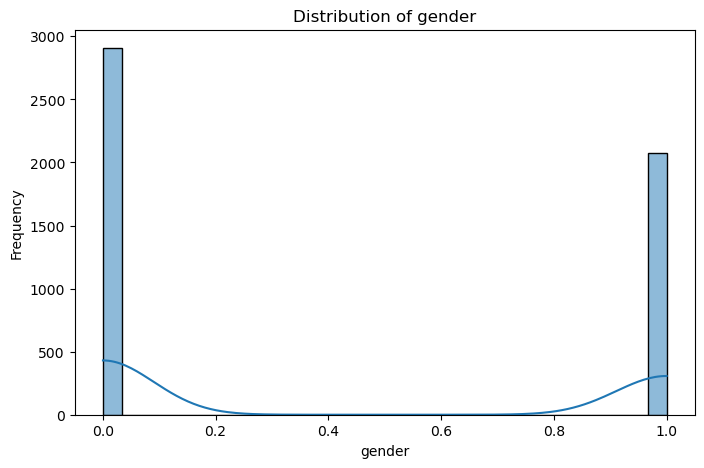

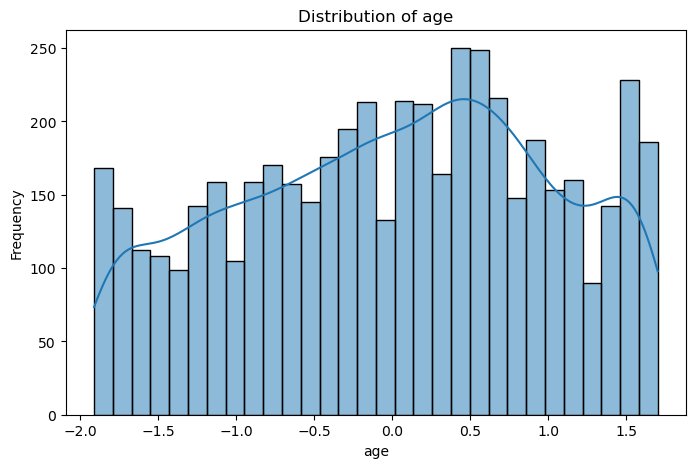

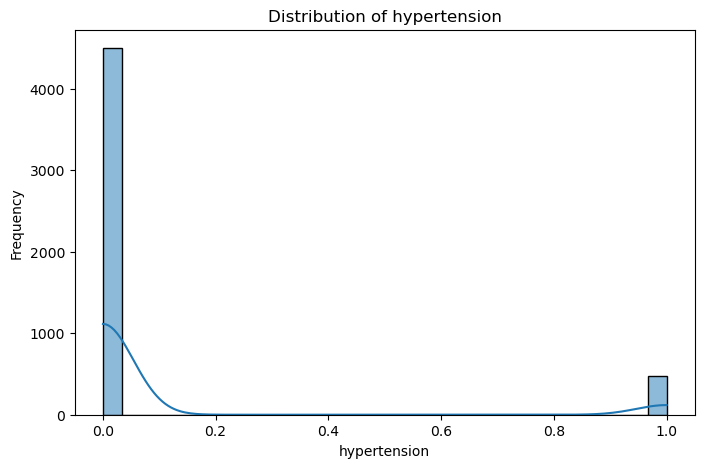

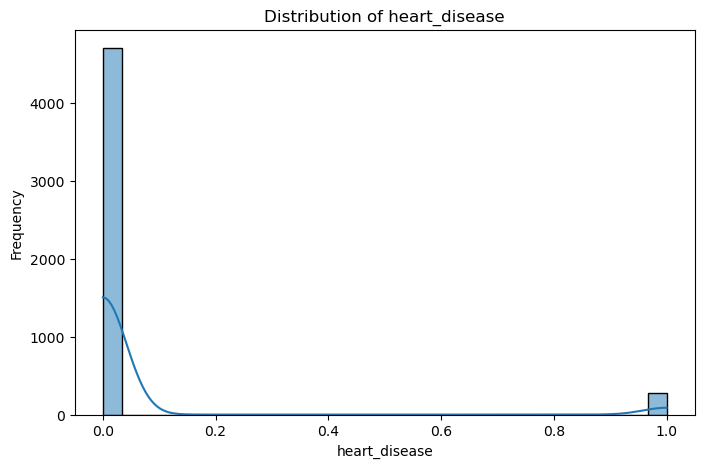

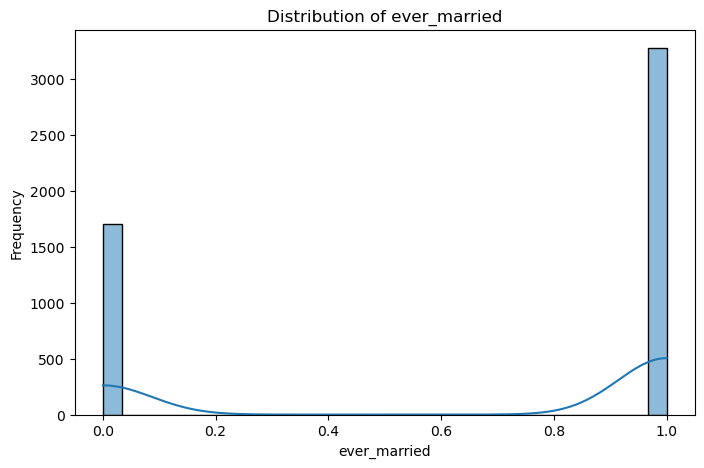

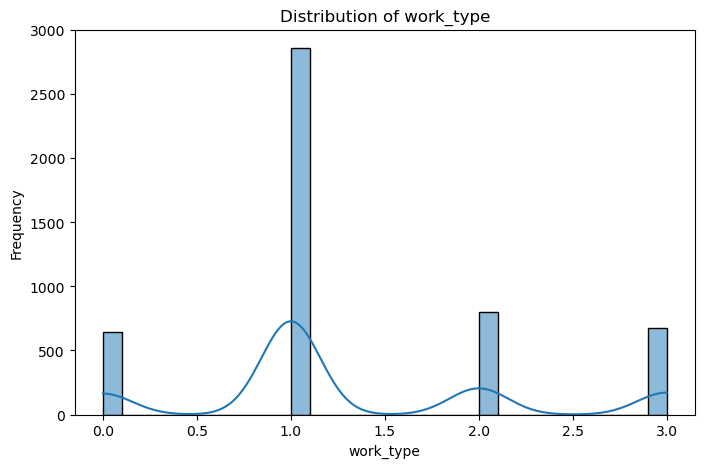

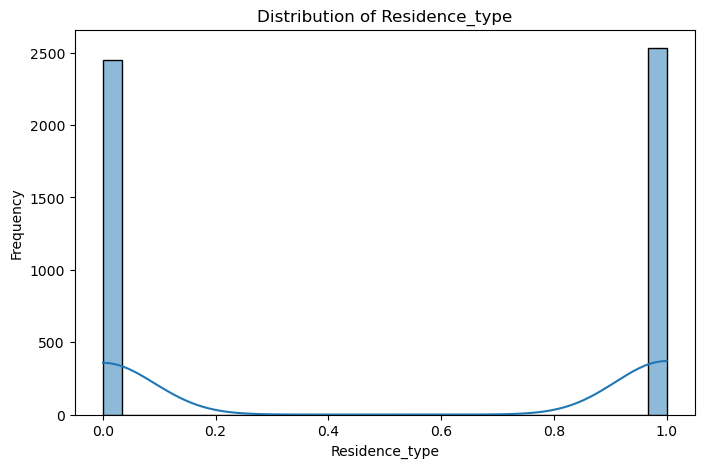

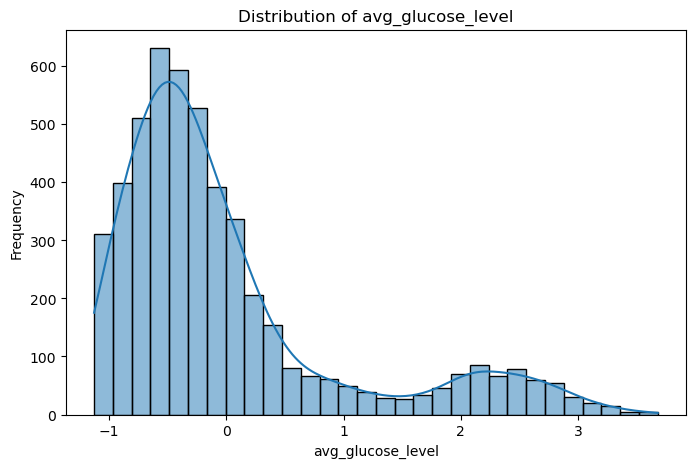

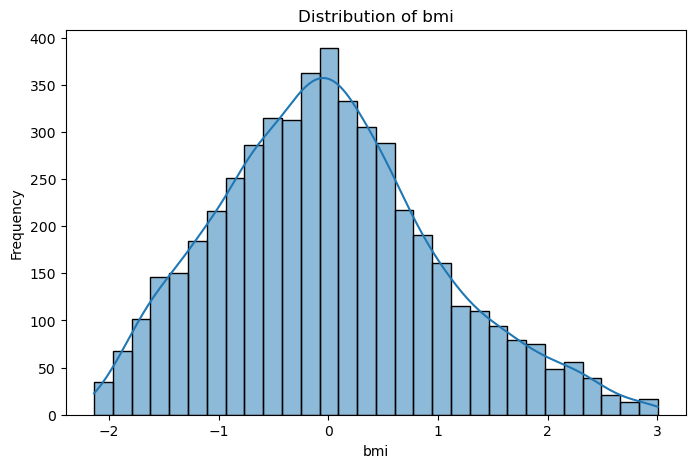

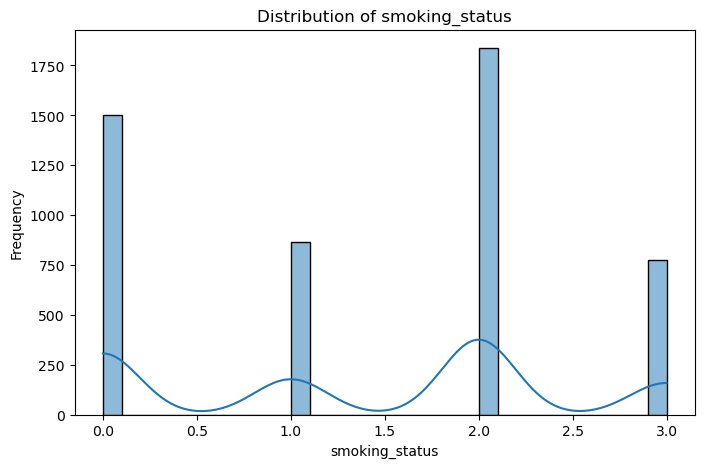

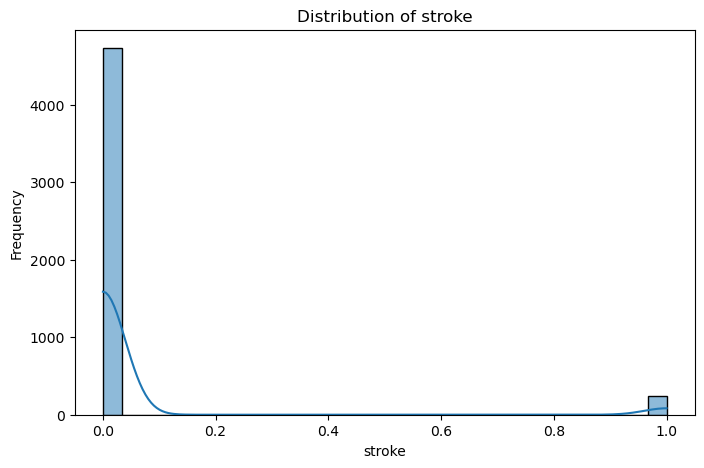

In [12]:
# Descriptive statistics for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Descriptive statistics for numerical features:")
print(data[numerical_cols].describe())

# Visualizing distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

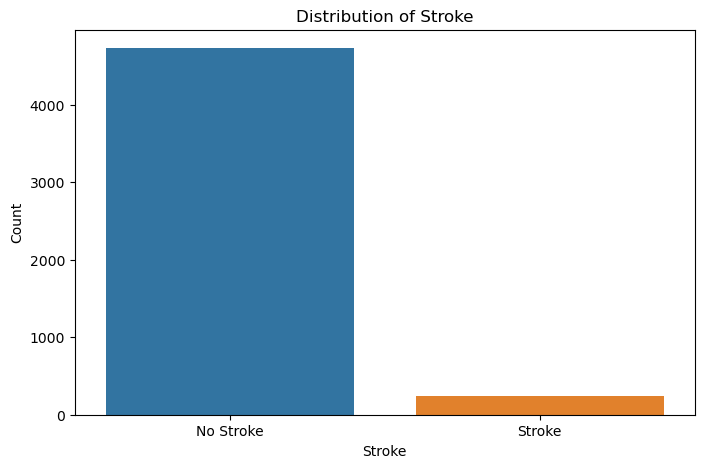

In [13]:
# Check for imbalance in the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=data)
plt.title("Distribution of Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

In [14]:
# Dropping stroke
X = data.drop('stroke', axis=1)
y = data['stroke']

In [15]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,-0.106788,0,0,0,1,0,-0.794162,0.191733,1
4977,1,-0.150917,0,0,1,1,1,1.890500,0.383197,3
4978,0,0.069731,1,0,1,0,0,-0.242364,0.486294,3
4979,1,-0.150917,0,0,1,1,0,-0.488199,0.221189,3


**Logistic Regression With Stratified Cross Validation**

In [17]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
lr = LogisticRegression()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    lr.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9498997995991983, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9518072289156626, 0.9518072289156626]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.97991967871486 %

Overall Accuracy: 95.02108634940564 %

Standard Deviation is: 0.0008419430046900221


**Train Test Split Without Stratification**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Logistic Regression Without Stratified Cross Validation**

In [21]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495

[[1417    0]
 [  78    0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**K Nearest Neighbor Classifier With Stratified Cross Validation**

In [23]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
kc = KNeighborsClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    kc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(kc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))




List of possible accuracy: [0.9438877755511023, 0.9457831325301205, 0.9477911646586346, 0.9497991967871486, 0.9497991967871486, 0.9457831325301205, 0.9518072289156626, 0.9497991967871486, 0.9437751004016064, 0.9457831325301205]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.74008257478813 %

Standard Deviation is: 0.002792121938604873


**K Nearest Neighbors Without Stratified Cross Validation**

In [25]:

# K-Nearest Neighbors

kc.fit(X_train, y_train)
y_pred_kc = kc.predict(X_test)

print("\nK-Nearest Neighbors(Train-Test Split)")
print(classification_report(y_test, y_pred_kc))
print(confusion_matrix(y_test, y_pred_kc))


K-Nearest Neighbors(Train-Test Split)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1417
           1       0.09      0.01      0.02        78

    accuracy                           0.94      1495
   macro avg       0.52      0.50      0.50      1495
weighted avg       0.90      0.94      0.92      1495

[[1407   10]
 [  77    1]]


**Random Forest Classifier With Stratified Cross Validation**

In [27]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Rc = RandomForestClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Rc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Rc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))





List of possible accuracy: [0.9498997995991983, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9477911646586346, 0.9497991967871486, 0.9497991967871486, 0.9437751004016064]

Maximum Accuracy That can be obtained from this model is: 94.98997995991984 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.9006044216948 %

Standard Deviation is: 0.0019448262196310917


**Random Forest Without Stratified Cross Validation**

In [29]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495

[[1413    4]
 [  78    0]]


**Gradient Boosting Classifier With Stratified Cross Validation**

In [31]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Gc = GradientBoostingClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Gc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Gc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9458917835671342, 0.9457831325301205, 0.9477911646586346, 0.9457831325301205, 0.9518072289156626, 0.9457831325301205, 0.9477911646586346, 0.9457831325301205, 0.9497991967871486, 0.9437751004016064]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.69988169109303 %

Standard Deviation is: 0.002351075601996058


**Gradient Boosting Classifier Without Stratified Cross Validation**

In [33]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.40      0.03      0.05        78

    accuracy                           0.95      1495
   macro avg       0.67      0.51      0.51      1495
weighted avg       0.92      0.95      0.92      1495

[[1414    3]
 [  76    2]]


**Decision Tree Classifier With Stratified Cross Validation**

In [35]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
DT = DecisionTreeClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    DT.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(DT.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.8997995991983968, 0.8955823293172691, 0.9076305220883534, 0.9096385542168675, 0.8795180722891566, 0.9076305220883534, 0.9036144578313253, 0.9076305220883534, 0.9136546184738956, 0.9056224899598394]

Maximum Accuracy That can be obtained from this model is: 91.36546184738957 %

Minimum Accuracy: 87.95180722891565 %

Overall Accuracy: 90.3032168755181 %

Standard Deviation is: 0.009694365475426164


**Decision Tree Without Stratified Cross Validation**

In [37]:
# Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_DT))
print(confusion_matrix(y_test, y_pred_DT))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1417
           1       0.14      0.17      0.15        78

    accuracy                           0.90      1495
   macro avg       0.55      0.56      0.55      1495
weighted avg       0.91      0.90      0.91      1495

[[1339   78]
 [  65   13]]


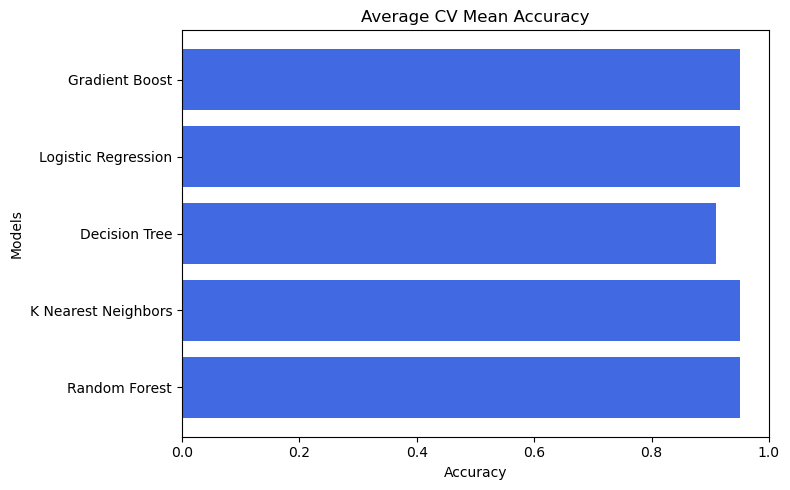

In [38]:
import matplotlib.pyplot as plt

# Define the data
models = ['Random Forest', 'K Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Gradient Boost']
accuracy = [0.95, 0.95, 0.91, 0.95, 0.95]

plt.figure(figsize=(8, 5))
plt.barh(models, accuracy, color='royalblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Average CV Mean Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Analysis: 
The models that were used, like Random Forest, K Nearest Neighbors, Logistic Regression, and Gradient Boost, all got a high accuracy of 0.95. The Decision Tree was still good but a little lower, at 0.91.

Why Some Models Performed Better:
Random Forest: This model combines many decision trees, so it reduces overfitting and gives better results. It can handle more complex data, which is why it did so well here.

K Nearest Neighbors (KNN): KNN also worked well, which could mean the data is easy to classify. It might not have complicated patterns, so KNN could classify it without much trouble.

Logistic Regression: Even though it is a simple model, it still performed great. This might be because the data is mostly linearly separable, making it easy for Logistic Regression to classify the strokes.

Gradient Boost: Similar to Random Forest, it creates models step by step to fix errors from before. Its high accuracy shows it learned well from the mistakes of other models and made stronger predictions

Decision Tree: Decision Trees are good at explaining the results but sometimes overfit, which might be why it did not do as well as the others.

Conclusion:
The four models that performed the best likely show that the dataset is good and the features are strong. Random Forest and Gradient Boost might be more reliable in the long run because they are less likely to overfit. All models, except for Decision Tree, performed very similarly, meaning the data might not need very complex models to classify it well.